<center><img src="prog_lang.jpg" width=500></center>

How can you determine which programming languages and technologies are most widely used? Which languages are gaining or losing popularity, helping you decide where to focus your efforts?

One excellent data source is Stack Overflow, a programming question-and-answer site with more than 16 million questions on programming topics. Each Stack Overflow question is tagged with a label identifying its topic or technology. By counting the number of questions related to each technology, you can estimate the popularity of different programming languages.

In this project, you will use data from the Stack Exchange Data Explorer to examine how the relative popularity of R, Python, Java, and JavaScript has changed over time.

You'll work with a dataset containing one observation per tag per year, including the number of questions for that tag and the total number of questions that year.

`stack_overflow_data.csv`
|Column|Description|
|------|-----------|
|`year`|The year the question was asked (2008-2020)|
|`tag`|A word or phrase that describes the topic of the question, such as the programming language|
|`num_questions`|The number of questions with a certain tag in that year|
|`year_total`|The total number of questions asked in that year|

In [91]:
# Load necessary packages
library(readr)
library(dplyr)
library(ggplot2)

In [92]:
# Load the dataset
data <- read_csv("stack_overflow_data.csv")

Rows: 420066 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, num_questions, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [93]:
# Analysing data using glimpse()
glimpse(data)

Rows: 420,066
Columns: 4
$ year          <dbl> 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 20…
$ tag           <chr> "treeview", "scheduled-tasks", "specifications", "render…
$ num_questions <dbl> 69, 30, 21, 35, 6, 1, 159, 10, 4, 20, 11, 5, 19, 2, 19, …
$ year_total    <dbl> 168541, 168541, 168541, 168541, 168541, 168541, 168541, …


## Question 1:
### Analyze the number of questions tagged with R each year compared to the total number of questions across all tags per year. Save the result in a data frame, r_over_time, containing five columns: year, tag, num_questions, year_total, and percentage (proportion of R questions).

In [94]:
r_over_time <- data %>%
				filter(tag == "r") %>%
				mutate(percentage = (num_questions/year_total)*100)
glimpse(r_over_time)

Rows: 13
Columns: 5
$ year          <dbl> 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 20…
$ tag           <chr> "r", "r", "r", "r", "r", "r", "r", "r", "r", "r", "r", "…
$ num_questions <dbl> 8, 523, 2264, 5835, 12183, 22256, 30923, 40704, 44365, 5…
$ year_total    <dbl> 168541, 981124, 1970729, 3473395, 4787010, 6037170, 6431…
$ percentage    <dbl> 0.00474662, 0.05330621, 0.11488135, 0.16799126, 0.254501…


## Question 2:
### Calculate the percentage of all questions in 2020 that were tagged with R. Save your answer as a numeric variable, r_percentage, expressed as a decimal.

In [95]:
r_2020 <- r_over_time %>%
		filter(year == 2020)

r_percentage <- r_2020$percentage
r_percentage

[1] 0.9658242

## Question 3:
### Identify the five programming language tags with the highest total number of questions asked between 2015 and 2020. Save the tag names as a character vector, highest_tags.

In [96]:
data_highest_top <- data %>%
				filter(year >= 2015 & year <= 2020) %>%
				group_by(tag) %>%
				summarise(total_tags = sum(num_questions)) %>%
				arrange(desc(total_tags)) %>%
				head(n = 5)

highest_tags <- data_highest_top$tag
highest_tags

[1] "javascript" "python"     "java"       "android"    "c#"

## Bonus: 
### try visualizing the data along the way!

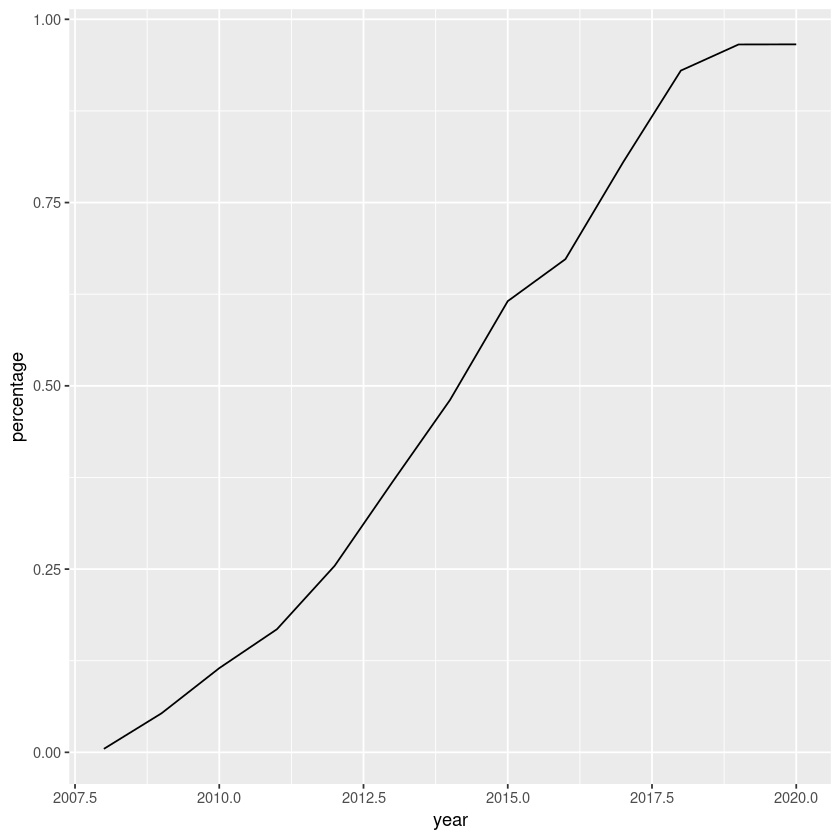

In [97]:
# Q1 - geom_line
ggplot(r_over_time, aes(x = year, y = percentage)) +
geom_line()

In [98]:
# Q2 - no visualization

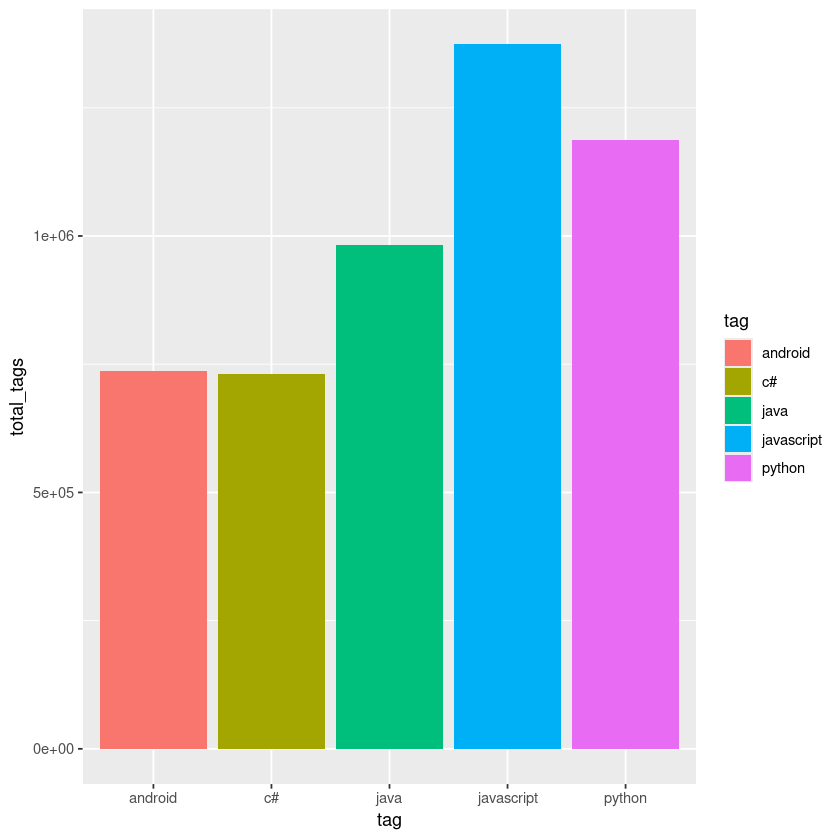

In [99]:
# Q3 - geom_bar
ggplot(data_highest_top, aes(x = tag, y = total_tags, fill = tag)) + 
geom_bar(stat = "identity")